# Import and set up

In [1]:
%%time 
# Necessary librarys
import os # it's a operational system library, to set some informations
import random # random is to generate random values

import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values

import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
#import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

# Importing librarys to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file

# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

Wall time: 13.7 s


In [2]:
RANDOM_SEED = 9999
np.random.seed(RANDOM_SEED)

In [3]:
%%time 
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format

dir_path = 'C:/Users/johnk/Desktop/Grad School/4. Fall 2018/1. MSDS 458 - Deep Learning/6. Homework/Assignment 5/input/' # you can change to your local 

# p is a fractional number to skiprows and read just a random sample of the our dataset. 
p = 0.50 #*** In this case we will use 50% of data set *** #

#Code to transform the json format columns in table
def json_read(df):
    #joining the [ path + df received]
    data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     skiprows=lambda i: i>0 and random.random() > p # Number of rows that will be imported randomly
                    )
    
    for column in columns: #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df # returning the df after importing and transforming

Wall time: 0 ns


In [4]:
# %%time is used to calculate the timing of code chunk execution #
# We will import the data using the name and extension that will be concatenated with dir_path
df_train = json_read("train_v2.csv") 

Loaded train_v2.csv. Shape: (853799, 60)


In [5]:
%%time 
# The same to test dataset
df_test = json_read("test_v2.csv") 

Loaded test_v2.csv. Shape: (200161, 59)
Wall time: 1min 15s


In [6]:
df_train["date"] = pd.to_datetime(df_train["date"],format="%Y%m%d")
df_train["visitStartTime"] = pd.to_datetime(df_train["visitStartTime"],unit='s')

df_test["date"] = pd.to_datetime(df_test["date"],format="%Y%m%d")
df_test["visitStartTime"] = pd.to_datetime(df_test["visitStartTime"],unit='s')

# Data Exploration

In [7]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,2017-10-17 00:53:33,Chrome,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)
1,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,2017-10-16 16:04:11,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,0166277907528479249,"[{'hitNumber': '1', 'time': '0', 'hour': '16',...",Not Socially Engaged,1508196701,1,2017-10-16 23:31:41,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,NaN,(none),/offer/2145,(direct)
3,Organic Search,"[{'index': '4', 'value': 'Central America'}]",2017-10-16,632878546807742341,"[{'hitNumber': '1', 'time': '0', 'hour': '19',...",Not Socially Engaged,1508207516,1,2017-10-17 02:31:56,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,1259490915281096752,"[{'hitNumber': '1', 'time': '0', 'hour': '7', ...",Not Socially Engaged,1508165159,2,2017-10-16 14:45:59,Safari,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [8]:
df_train['totals.hits'] = df_train['totals.hits'].astype('float32')
df_train['visitNumber'] = df_train['visitNumber'].astype('float32')
df_train['trafficSource.adwordsClickInfo.page'] = df_train['trafficSource.adwordsClickInfo.page'].astype('float32').fillna(0)
df_train['totals.bounces'] = df_train['totals.bounces'].astype('float32').fillna(0)
df_train['totals.newVisits'] = df_train['totals.newVisits'].astype('float32').fillna(0)
df_train['totals.pageviews'] = df_train['totals.pageviews'].astype('float32')
df_train['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].astype('float32').fillna(0)
df_train['totals.visits'] = df_train['totals.visits'].astype('float32')
df_train['setind'] = 'train'

In [9]:
df_test['totals.hits'] = df_test['totals.hits'].astype('float32')
df_test['visitNumber'] = df_test['visitNumber'].astype('float32')
df_test['trafficSource.adwordsClickInfo.page'] = df_test['trafficSource.adwordsClickInfo.page'].astype('float32').fillna(0)
df_test['totals.bounces'] = df_test['totals.bounces'].astype('float32').fillna(0)
df_test['totals.newVisits'] = df_test['totals.newVisits'].astype('float32').fillna(0)
df_test['totals.pageviews'] = df_test['totals.pageviews'].astype('float32')
df_test['totals.transactionRevenue'] = df_test['totals.transactionRevenue'].astype('float32').fillna(0)
df_test['totals.visits'] = df_test['totals.visits'].astype('float32')
df_test['setind'] = 'test'

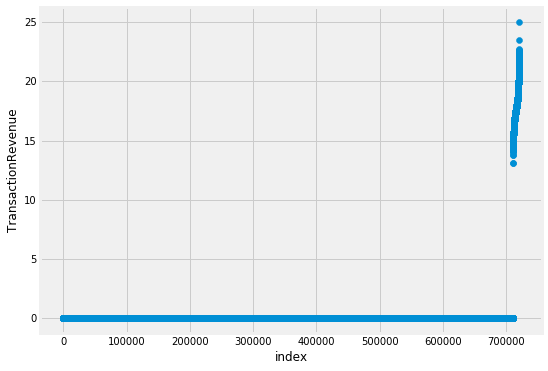

In [10]:
gdf = df_train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853799 entries, 0 to 853798
Data columns (total 61 columns):
channelGrouping                                      853799 non-null object
customDimensions                                     853799 non-null object
date                                                 853799 non-null datetime64[ns]
fullVisitorId                                        853799 non-null object
hits                                                 853799 non-null object
socialEngagementType                                 853799 non-null object
visitId                                              853799 non-null int64
visitNumber                                          853799 non-null float32
visitStartTime                                       853799 non-null datetime64[ns]
device.browser                                       853799 non-null object
device.browserSize                                   853799 non-null object
device.browserVersion                

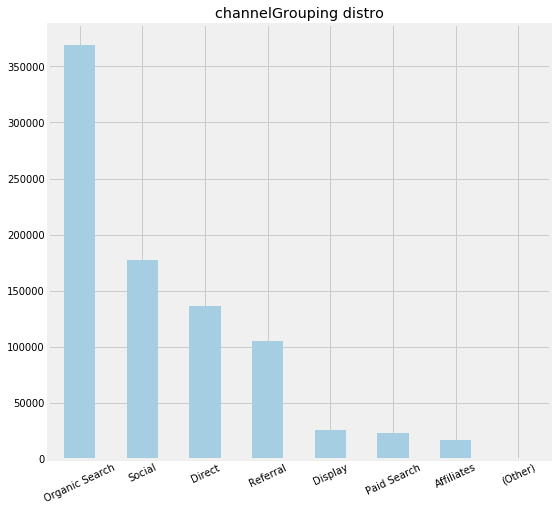

In [12]:
df_train.channelGrouping.value_counts().plot(kind="bar",title="channelGrouping distro",figsize=(8,8),rot=25,colormap='Paired')

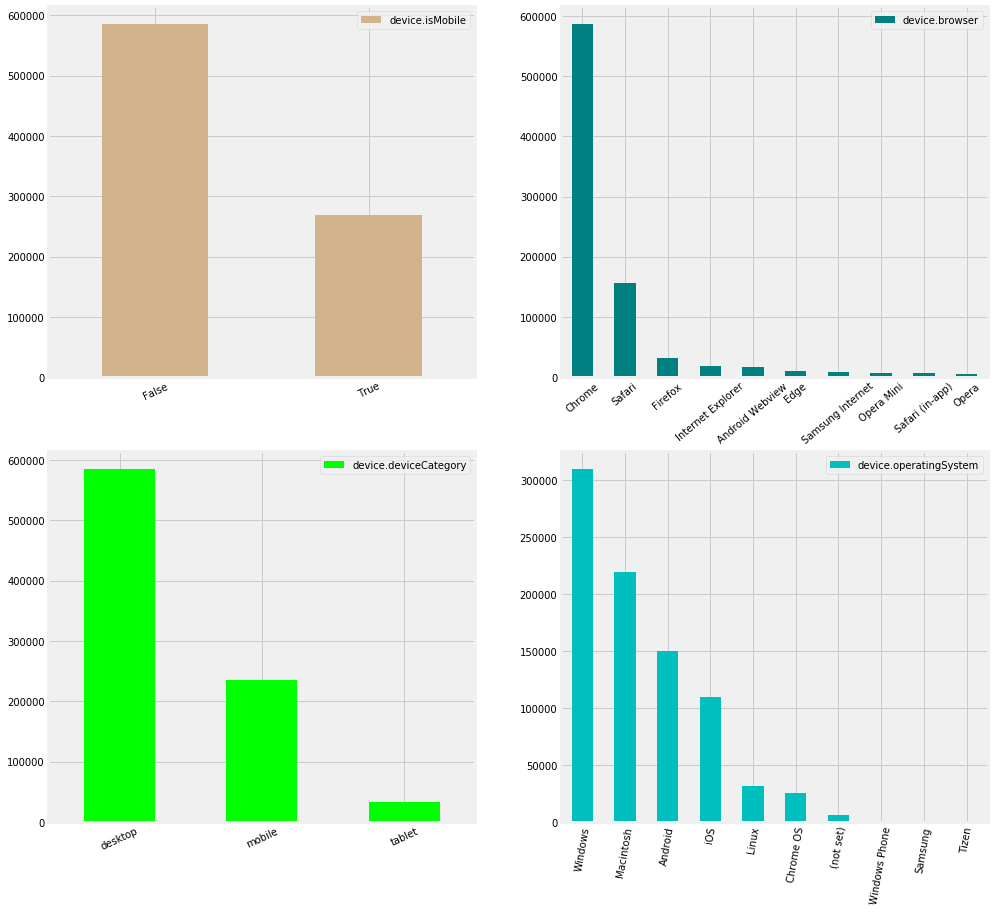

In [13]:
fig, axes = plt.subplots(2,2,figsize=(15,15))
df_train["device.isMobile"].value_counts().plot(kind="bar",ax=axes[0][0],rot=25,legend="isMobile",color='tan')
df_train["device.browser"].value_counts().head(10).plot(kind="bar",ax=axes[0][1],rot=40,legend="browser",color='teal')
df_train["device.deviceCategory"].value_counts().head(10).plot(kind="bar",ax=axes[1][0],rot=25,legend="deviceCategory",color='lime')
df_train["device.operatingSystem"].value_counts().head(10).plot(kind="bar",ax=axes[1][1],rot=80,legend="operatingSystem",color='c')

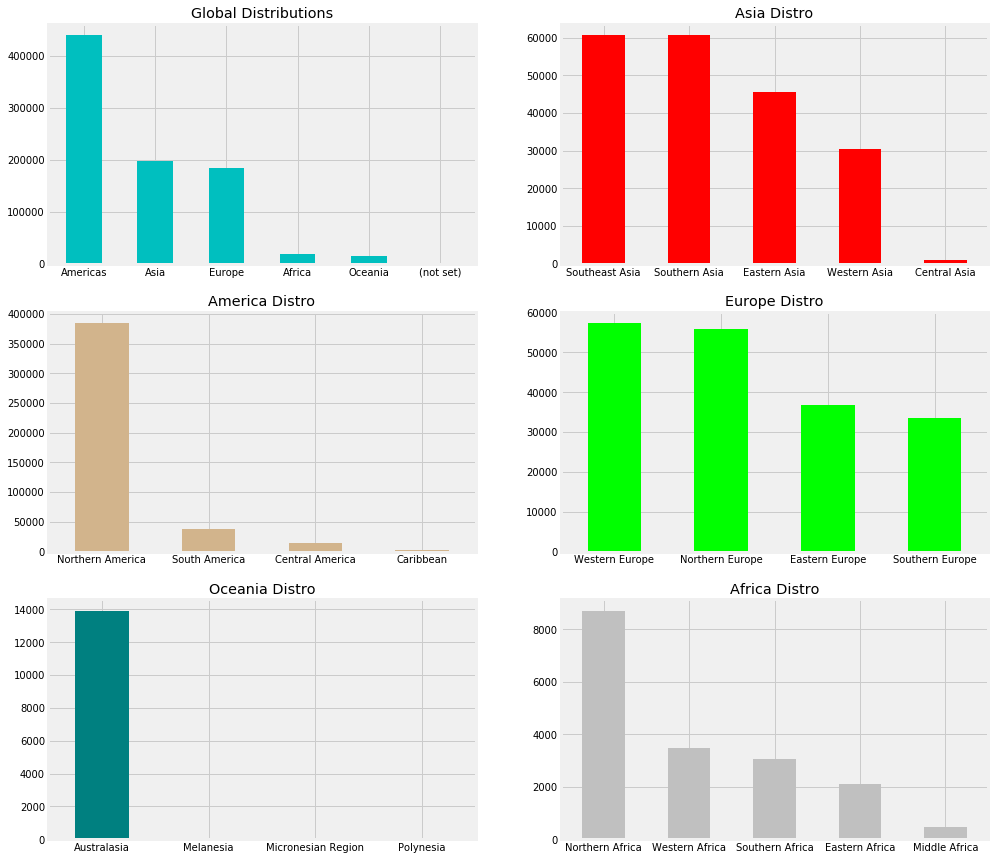

In [14]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
df_train["geoNetwork.continent"].value_counts().plot(kind="bar",ax=axes[0][0],title="Global Distributions",rot=0,color="c")
df_train[df_train["geoNetwork.continent"] == "Americas"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax=axes[1][0], title="America Distro",rot=0,color="tan")
df_train[df_train["geoNetwork.continent"] == "Asia"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax=axes[0][1], title="Asia Distro",rot=0,color="r")
df_train[df_train["geoNetwork.continent"] == "Europe"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax=axes[1][1],  title="Europe Distro",rot=0,color="lime")
df_train[df_train["geoNetwork.continent"] == "Oceania"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax = axes[2][0], title="Oceania Distro",rot=0,color="teal")
df_train[df_train["geoNetwork.continent"] == "Africa"]["geoNetwork.subContinent"].value_counts().plot(kind="bar" , ax=axes[2][1], title="Africa Distro",rot=0,color="silver")


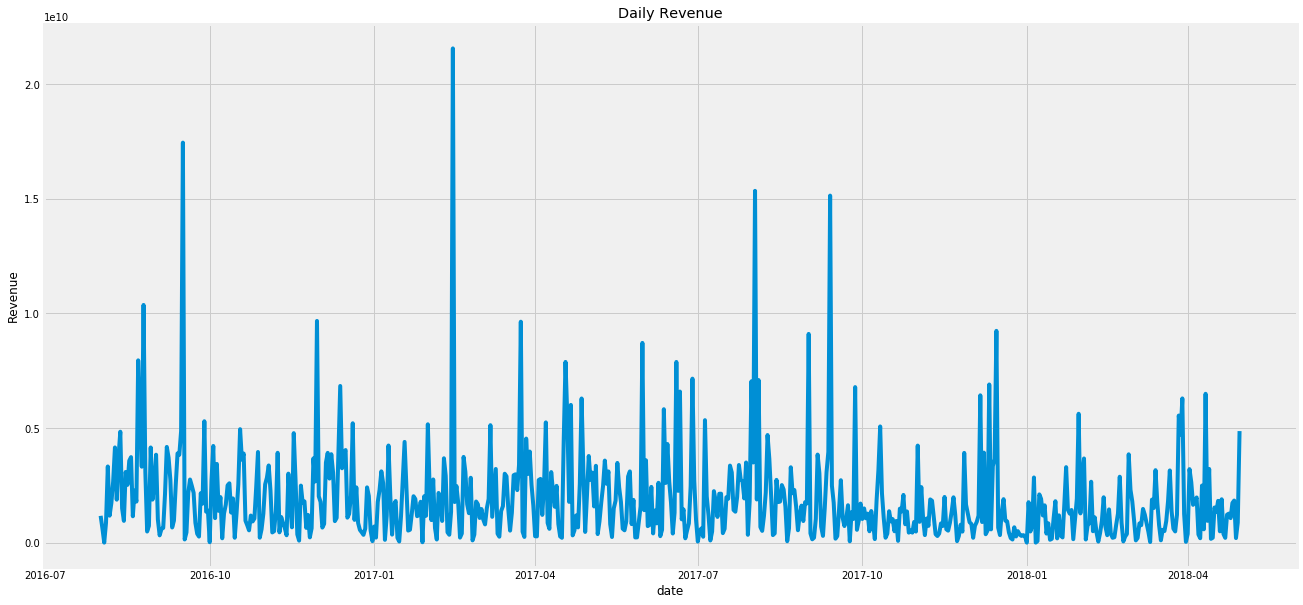

In [15]:
daily_df = df_train.groupby(by=["date"],axis = 0 ).sum()
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Daily Revenue")
axes.set_ylabel("Revenue")
axes.set_xlabel("date")
axes.plot(daily_df["totals.transactionRevenue"])

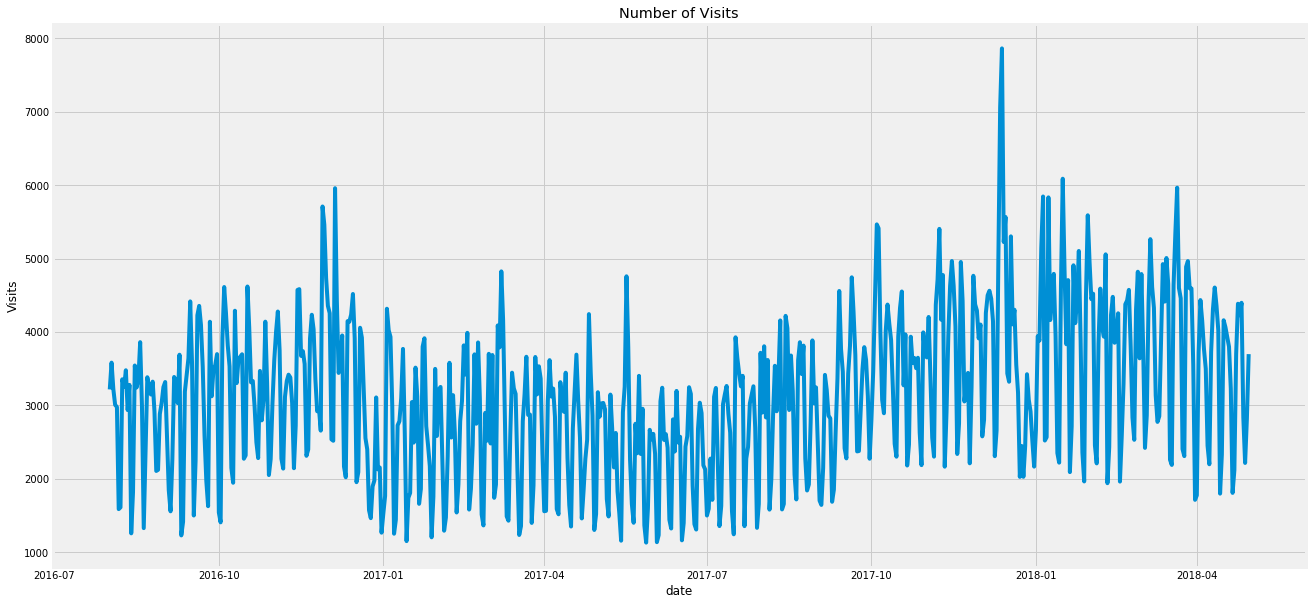

In [16]:
daily_df = df_train.groupby(by=["date"],axis = 0 ).sum()
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Number of Visits")
axes.set_ylabel("Visits")
axes.set_xlabel("date")
axes.plot(daily_df["visitNumber"])

# Feature Engineering and Data Prep

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()

In [18]:
df = pd.concat([df_train,df_test])
df = df[df['totals.transactionRevenue'] != 0]

#df['revenue_ind'] = np.where(df['totals.transactionRevenue']>0, 1,0)

list_cols = ['visitNumber',
             'totals.bounces',
             'totals.hits',
             'totals.pageviews',
             'totals.newVisits',
             'totals.visits',
             'trafficSource.adwordsClickInfo.page',
             'channelGrouping',
             'socialEngagementType',
             'device.browser',
             'device.browserSize',
             'device.browserVersion',
             'device.deviceCategory',
             'device.flashVersion',
             'device.isMobile',
             'device.language',
             'device.mobileDeviceBranding',
             'device.mobileDeviceInfo',
             'device.mobileDeviceMarketingName',
             'device.mobileDeviceModel',
             'device.mobileInputSelector',
             'device.operatingSystem',
             'device.operatingSystemVersion',
             'device.screenColors',
             'device.screenResolution',
             'geoNetwork.city',
             'geoNetwork.continent',
             'geoNetwork.country',
             'trafficSource.adContent',
             'trafficSource.source',
             'setind', 
             'totals.transactionRevenue']

df = df.loc[:, list_cols]

C:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [19]:
def scale_em(series_name):
    tmp = min_max_scaler.fit_transform(df[series_name].values.reshape(-1,1))
    df[series_name] = tmp
    return

In [20]:
x = ['visitNumber','totals.hits','trafficSource.adwordsClickInfo.page',
    'totals.bounces', 'totals.newVisits', 'totals.pageviews','totals.visits',
    'totals.transactionRevenue']

for i in x:
    scale_em(i)

In [21]:
def oneHotEncode(df2,colNames):
    for col in colNames:
        if( df2[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df2[col],prefix=col)
            df2 = pd.concat([df2,dummies],axis=1)

            #drop the encoded column
            df2.drop([col],axis = 1 , inplace=True)
    return df2

In [22]:
df = oneHotEncode(df, ['channelGrouping',
                       'socialEngagementType',
                       'device.browser',
                       'device.browserSize',
                       'device.browserVersion',
                       'device.deviceCategory',
                       'device.flashVersion',
                       'device.language',
                       'device.mobileDeviceBranding',
                       'device.mobileDeviceInfo',
                       'device.mobileDeviceMarketingName',
                       'device.mobileDeviceModel',
                       'device.mobileInputSelector',
                       'device.operatingSystem',
                       'device.operatingSystemVersion',
                       'device.screenColors',
                       'device.screenResolution',
                       'geoNetwork.city',
                       'geoNetwork.continent',
                       'geoNetwork.country',
                       'trafficSource.adContent',
                       'trafficSource.source'])

In [23]:
df_train2 = df[df['setind']=='train']
df_test = df[df['setind']=='test']

In [24]:
x_train = df_train2.drop(columns=['totals.transactionRevenue','setind'])
y_train = df_train2['totals.transactionRevenue']

In [25]:
x_test = df_test.drop(columns=['totals.transactionRevenue','setind'])
y_test = df_test['totals.transactionRevenue']

In [26]:
df.head()

,visitNumber,totals.bounces,totals.hits,totals.pageviews,totals.newVisits,totals.visits,trafficSource.adwordsClickInfo.page,device.isMobile,setind,totals.transactionRevenue,...,trafficSource.source_productforums.google.com,trafficSource.source_reddit.com,trafficSource.source_search.tb.ask.com,trafficSource.source_siliconvalley.about.com,trafficSource.source_sites.google.com,trafficSource.source_support.google.com,trafficSource.source_t.co,trafficSource.source_trainup.withgoogle.com,trafficSource.source_yahoo,trafficSource.source_youtube.com
201,-0.014070,0.0,-0.934961,-0.915962,-0.807317,0.0,-0.189419,False,train,-0.228578,...,0,0,0,0,0,0,0,0,0,0
261,0.435652,0.0,-0.712550,-0.756370,-0.807317,0.0,-0.189419,False,train,-0.242993,...,0,0,0,0,0,0,0,0,0,0
265,0.114422,0.0,-0.712550,-0.596779,-0.807317,0.0,-0.189419,True,train,-0.144155,...,0,0,0,0,0,0,0,0,0,0
294,0.821128,0.0,-0.601344,-0.543581,-0.807317,0.0,-0.189419,False,train,-0.222483,...,0,0,0,0,0,0,0,0,0,0
325,-0.206807,0.0,-0.230659,-0.224398,1.238671,0.0,-0.189419,False,train,-0.237600,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6

In [28]:
# Under Sampling

#len(df_train[df_train['revenue_ind'] == 1]) 

# Keras Machine Learning

In [29]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

from sklearn.metrics import confusion_matrix, accuracy_score, auc

Using TensorFlow backend.


Epoch 1/100
9326/9326 [==============================] - 5s 491us/step - loss: 0.7761
Epoch 2/100
9326/9326 [==============================] - 1s 57us/step - loss: 0.7653
Epoch 3/100
9326/9326 [==============================] - 1s 58us/step - loss: 0.7325
Epoch 4/100
9326/9326 [==============================] - 1s 59us/step - loss: 0.6989
Epoch 5/100
9326/9326 [==============================] - 1s 58us/step - loss: 0.6758
Epoch 6/100
9326/9326 [==============================] - 1s 58us/step - loss: 0.6570
Epoch 7/100
9326/9326 [==============================] - 1s 57us/step - loss: 0.6571
Epoch 8/100
9326/9326 [==============================] - 1s 58us/step - loss: 0.6579
Epoch 9/100
9326/9326 [==============================] - 1s 57us/step - loss: 0.6431
Epoch 10/100
9326/9326 [==============================] - 1s 59us/step - loss: 0.6353
Epoch 11/100
9326/9326 [==============================] - 1s 59us/step - loss: 0.6381
Epoch 12/100
9326/9326 [==============================] - 1s 6

9326/9326 [==============================] - 1s 57us/step - loss: 0.3161
Epoch 97/100
9326/9326 [==============================] - 1s 57us/step - loss: 0.3214
Epoch 98/100
9326/9326 [==============================] - 1s 56us/step - loss: 0.3129
Epoch 99/100
9326/9326 [==============================] - 1s 63us/step - loss: 0.3030
Epoch 100/100
9326/9326 [==============================] - 1s 56us/step - loss: 0.3094


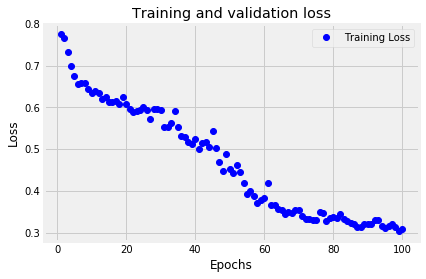

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               41600     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 52,609
Trainable params: 52,609
Non-trainable params: 0
_________________________________________________________________


In [31]:
def model():
    # create model
    model = Sequential()
    model.add(layers.Dense(128, input_dim=324, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(8,  kernel_initializer='normal',activation='relu'))
    model.add(layers.Dense(1,  kernel_initializer='normal'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mse', optimizer='adam')
    return model

model = model()
history = model.fit(x_train,
                    y_train,
                    epochs = 100,
                    batch_size = 350,
                    verbose = True)

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
#plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model.summary()

In [32]:
pred = model.predict(x_test)

print(pred)

[[-0.10441647]
 [-0.15694115]
 [-0.10037826]
 ...
 [ 0.08363287]
 [ 0.301028  ]
 [-0.16277681]]


In [33]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, model.predict(x_test))
print(score)

2.034254


In [34]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, model.predict(x_test))
print(score)

0.27552676


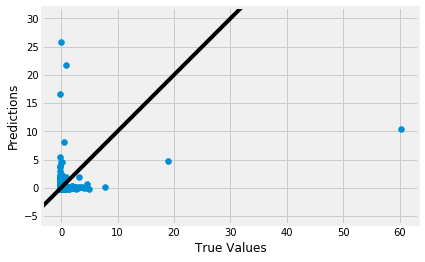

In [35]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, model.predict(x_test))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100], color='black')